## Predicción del consumo de gasolina usando TensorFlow

### Importar librerías

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

### Descargar el conjunto de datos

In [7]:

data = pd.read_csv('petrol_consumption.csv')

### Exploración de los datos

In [8]:

data.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [9]:

# Obtenga el tamaño del dataset (número de ejemplos y número de características) con la función shape
data.shape
# Visualice el DataFrame con la función head(), tail() o sample()
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [10]:

# Características
X = data.iloc[:, 0:4]
X.shape

(48, 4)

In [11]:

# Objetivo
y = data.Petrol_Consumption
y.shape

(48,)

In [12]:

# Separe el conjunto de datos en entrenamiento y prueba  (relación: 80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:

print('Tamaño del conjunto de datos de entrenamiento: ', X_train.shape)
print('Tamaño del conjunto de datos de prueba: ', X_test.shape)

Tamaño del conjunto de datos de entrenamiento:  (38, 4)
Tamaño del conjunto de datos de prueba:  (10, 4)


### Preprocesamiento de los datos

In [14]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Definición del modelo

In [15]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

model = Sequential()
# Agregar más neuronas, con una capa oculta de regularización L2
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(4,)))
model.add(Dropout(0.2)) 

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))

model.add(Dense(1))

# Utilizar un optimizador
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mse' , optimizer='adam', metrics=["mean_squared_error"])

C:\Users\santi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:

plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


### Entrenamiento del modelo

In [18]:

es = EarlyStopping(monitor='val_loss', patience=10,  mode='min',  verbose=1)

In [19]:

# Entrenamiento
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50,verbose=1, callbacks=[es])

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 354452.8750 - mean_squared_error: 354452.8438 - val_loss: 307716.9688 - val_mean_squared_error: 307716.9375
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 348912.5625 - mean_squared_error: 348912.5312 - val_loss: 307644.3750 - val_mean_squared_error: 307644.3438
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 357654.7812 - mean_squared_error: 357654.7500 - val_loss: 307571.2188 - val_mean_squared_error: 307571.1875
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 356860.7500 - mean_squared_error: 356860.7188 - val_loss: 307495.7812 - val_mean_squared_error: 307495.7500
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 355707.8438 - mean_squared_error: 355707.8125 - val_loss: 307419.3125 - val_mean_squared_error: 307419.2812
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 356003.2812 - mean_squared_error: 356003.2500 - val_loss: 307340.9375 - val_mean_squared_error: 307340.9062
Epoch 7/5

### Evaluación del modelo

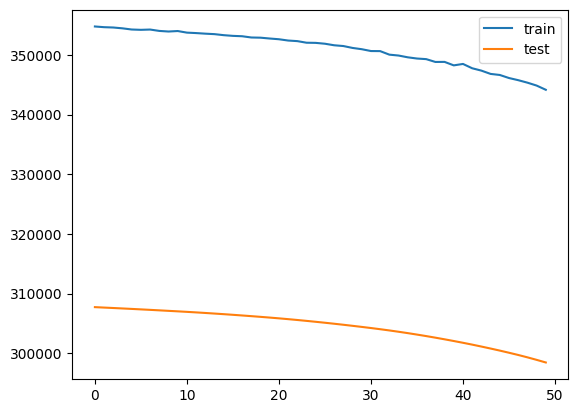

In [20]:

# Ploteando training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [21]:

# Error
y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_pred,y_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
546.2940531343913


In [22]:

y_pred.flatten()

array([10.224293 ,  9.094639 ,  7.896883 ,  8.579586 ,  9.417189 ,
        6.7328496, 10.441263 ,  8.023143 ,  9.761613 ,  6.0752273],
      dtype=float32)

In [23]:

y_test

29    534
4     410
26    577
30    571
32    577
37    704
34    487
40    587
7     467
10    580
Name: Petrol_Consumption, dtype: int64

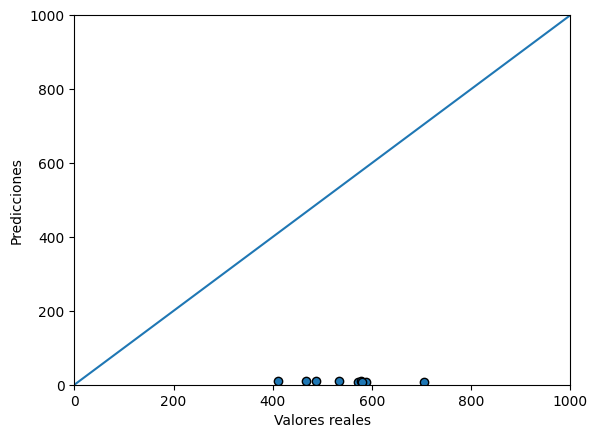

In [24]:

# Comparando predicciones vs valores reales
plt.scatter(y_test,y_pred, edgecolors=(0, 0, 0))
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

### Realizar una predicción

In [25]:

new_value = [8.0, 3448, 5399, 0.5]
# Escalar la nueva observación
new_value = sc.transform([new_value])
# Utilizar predict para predecir la nueva observación
prediction = model.predict(new_value)
print('Predicción: ', prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicción:  [[9.658433]]


C:\Users\santi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Activity

Modify the hyperparameters and/or architecture in order to improve the current results.